In [ ]:
import numpy as np

In [ ]:
import torch

In [ ]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [ ]:
import data_loaders

In [ ]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [ ]:
from deep_emotion import Deep_Emotion

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])

            loss = criterion(outputs,labels)
            #print(labels[0])

            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [ ]:
parser = argparse.ArgumentParser(description="Configuration of setup and training process")
parser.add_argument('-s', '--setup', type=bool, help='setup the dataset for the first time')


_StoreAction(option_strings=['-s', '--setup'], dest='setup', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='setup the dataset for the first time', metavar=None)

In [ ]:
parser.add_argument('-d', '--data', type=str,required= True,
                               help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)')


_StoreAction(option_strings=['-d', '--data'], dest='data', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)', metavar=None)

In [ ]:
parser.add_argument('-hparams', '--hyperparams', type=bool,
                               help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)')


_StoreAction(option_strings=['-hparams', '--hyperparams'], dest='hyperparams', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)', metavar=None)

In [ ]:
parser.add_argument('-e', '--epochs', type= int, help= 'number of epochs')
parser.add_argument('-lr', '--learning_rate', type= float, help= 'value of learning rate')
parser.add_argument('-bs', '--batch_size', type= int, help= 'training/validation batch size')
parser.add_argument('-t', '--train', type=bool, help='True when training')


_StoreAction(option_strings=['-t', '--train'], dest='train', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when training', metavar=None)

In [ ]:
epochs = 1500
lr = 0.001
batchsize = 128

In [ ]:
net = Deep_Emotion()

In [ ]:
net.to(device)

Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=9, bias=True)
  (softmax): Softmax(dim=1)
  (localization): Sequential(
    (0): Conv2d(1, 15, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, s

In [ ]:
print("Model archticture: ", net)

Model archticture:  Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=9, bias=True)
  (softmax): Softmax(dim=1)
  (localization): Sequential(
    (0): Conv2d(1, 15, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPoo

In [ ]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [ ]:
traincsv_file = "data" + "/"+"train.csv"
validationcsv_file = "data" + "/"+"val.csv"

In [ ]:
train_img_dir = "data"+"/"+"train/"

In [ ]:
validation_img_dir = "data"+"/"+"val/"

In [ ]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [ ]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [ ]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)


In [ ]:
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.0001, weight_decay = 0.0001)


In [ ]:
Train(epochs, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================


/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Epoch: 1 	Training Loss: 0.01309268 	Validation Loss 0.01362765 	Training Acuuarcy 70.403% 	Validation Acuuarcy 69.574%
Epoch: 2 	Training Loss: 0.01305359 	Validation Loss 0.01343619 	Training Acuuarcy 70.875% 	Validation Acuuarcy 71.747%
Epoch: 3 	Training Loss: 0.01308690 	Validation Loss 0.01358608 	Training Acuuarcy 70.506% 	Validation Acuuarcy 68.766%
Epoch: 4 	Training Loss: 0.01306671 	Validation Loss 0.01339220 	Training Acuuarcy 70.694% 	Validation Acuuarcy 70.577%
Epoch: 5 	Training Loss: 0.01305761 	Validation Loss 0.01360488 	Training Acuuarcy 70.912% 	Validation Acuuarcy 69.713%
Epoch: 6 	Training Loss: 0.01303795 	Validation Loss 0.01335291 	Training Acuuarcy 71.156% 	Validation Acuuarcy 71.385%
Epoch: 7 	Training Loss: 0.01307276 	Validation Loss 0.01357197 	Training Acuuarcy 70.753% 	Validation Acuuarcy 69.295%
Epoch: 8 	Training Loss: 0.01306310 	Validation Loss 0.01346181 	Training Acuuarcy 70.922% 	Validation Acuuarcy 69.769%
Epoch: 9 	Training Loss: 0.01304759 	Val

KeyboardInterrupt: 

In [ ]:
train = pd.read_csv("fer2013.csv")
td1 = pd.DataFrame(train.iloc[7178:10267, :])
td2 = pd.DataFrame(train.iloc[len(train)-4000:len(train)-3500, :])

In [ ]:
test_data = pd.concat([td1, td2], axis = 0)
len(test_data)

3589

In [ ]:
test_data =  test_data.reset_index(drop = 1)

In [ ]:
test_data

,emotion,pixels,Usage
0,3,196 201 197 191 192 184 165 161 156 81 47 48 4...,Training
1,4,28 38 45 55 66 80 92 102 111 121 131 137 144 1...,Training
2,0,121 129 118 115 119 131 146 156 163 168 176 18...,Training
3,3,211 216 202 197 200 172 153 140 134 153 152 16...,Training
4,2,54 39 40 67 101 117 139 145 160 137 91 92 88 7...,Training
...,...,...,...
3584,3,49 43 61 38 31 48 51 52 60 73 78 73 39 23 25 3...,PrivateTest
3585,4,17 22 16 11 13 10 10 11 12 26 58 92 116 131 14...,PrivateTest
3586,6,63 44 30 45 47 39 28 18 11 0 0 11 24 31 40 57 ...,PrivateTest
3587,2,24 22 24 27 29 32 38 152 143 119 155 185 177 1...,PrivateTest


In [ ]:
test_data.to_csv("data/test.csv")

In [ ]:
def str_to_image( str_img = ' '):

        imgarray_str = str_img.split(' ')
        imgarray = np.asarray(imgarray_str,dtype=np.uint8).reshape(48,48)
        return Image.fromarray(imgarray)

In [ ]:
foldername= "data/test/"
csvfile_path= "data/test.csv"
if not os.path.exists(foldername):
    os.mkdir(foldername)

data = pd.read_csv(csvfile_path)
images = data['pixels'] #dataframe to series pandas
numberofimages = images.shape[0]
for index in tqdm(range(numberofimages)):
    img = str_to_image(images[index])
    img.save(os.path.join(foldername,'{}{}.jpg'.format("test",index)),'JPEG')
print('Done saving {} data'.format((foldername)))

100%|█████████████████████████████████████| 3589/3589 [00:01<00:00, 2428.59it/s]

Done saving data/test/ data


In [ ]:
test_dataset= Plain_Dataset(csv_file="data/test.csv", img_dir = "data/test/", datatype = 'test', transform = transformation)


In [ ]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [ ]:
print("Final accuracy on the testing set = ", test_correct/3589)

Final accuracy on the testing set =  tensor(0.7239)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [ ]:
classes = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad',
        'Surprise', 'Neutral')

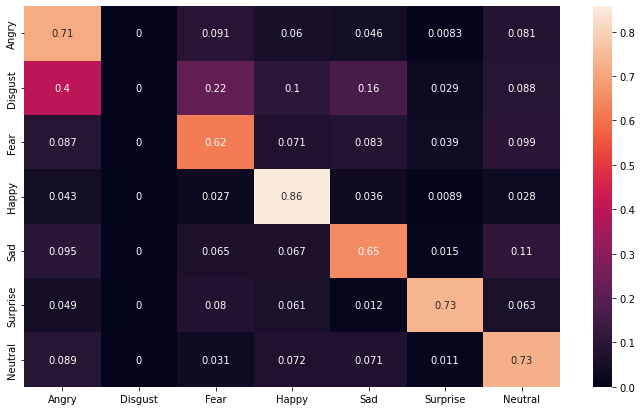

In [ ]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

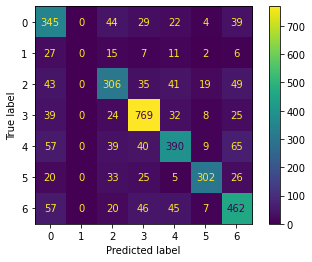

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_true,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(precision_score(y_true, y_pred, average = "micro"))

0.7171914182223461


In [ ]:
print(precision_score(y_true, y_pred, average = "macro"))

0.613388058195082


/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(recall_score(y_true, y_pred, average = "micro"))

0.7171914182223461


In [ ]:
print(recall_score(y_true, y_pred, average = "macro"))

0.6146207714646383


Conclusions:
    1. Data augmentation increased the performance by about 5 percent in the testing set.
    2. The model was able to classifiy most of the classes better but the same problem occured in the Disgust class.
    3. We will try to apply different data augemntation techniques for the disgust class.
    4. We will try to use machine learning interpretation to get to know why the model fails very badly in the              Disgust class.